# Analiza povezanosti između fizičke aktivnosti, mentalnog zdravlja i kvalitete života

### HANA TOMICH

In [1]:
!python -m pip install pandas

### Način prikupljanja podataka (ako je preuzet gotovi skup, navesti koji i citirati)

"Analiza povezanosti između fizičke aktivnosti, mentalnog zdravlja i kvalitete života", 
generirala sam podatke koristeći web stranicu generatedata.com (https://generatedata.com/). Na ovoj stranici odabrala sam određene atribute kao što su ime, godine, spol, i vrsta fizičke aktivnosti, te sam koristila alat za automatsko generiranje nasumičnih vrijednosti.
Podatke sam izvezla u dva formata - JSON i CSV - kako bih ih mogla koristiti za analizu.


### Način pretprocesiranja

Korištenjem funkcije pd.read_json(), učitani su poaci iz JSON datoteke u DataFrame. 
Uklanjanje nepotrebnih stupaca pomoću funkcije drop(). To su bili stupci 'email', 'adresa' i 'drzava'. Argument axis=1 uklanja stupce,inplace=True promjene na naš DataFrame
Ovo je korak u pretprocesiranju podataka, čistimo i pripremamo podatke kako bi bili spremni za analizu. Uklanjanje nepotrebnih stupaca pomaže u smanjenju kompleksnosti podataka i omogućava lakšu i efikasniju analizu.

In [2]:
# način pretprocesiranja i integracije podataka iz više skupova

import pandas as pd

# učitavanje JSON datoteke u pandas dataframe
json_path = 'C:\\Users\\hanat\\Desktop\\FOI\\Hana\\5. SEMESTAR\\PZAP\\projekt\\projekt_Tomich.json'
json_data = pd.read_json(json_path)

# brisanje stupaca koji su nepotrebni za konkretnu temu
json_data.drop(['email', 'adresa', 'drzava'], axis=1, inplace=True)

# prikaz nekoliko redova novog dataframe-a
print(json_data.head())



   id          ime_prezime  godine spol  trajanje_aktivnosti_dnevno  tjedno
0   1           Leo Morgan      57    F                          55       6
1   2        Shana Chapman      16    F                          81       6
2   3       Shad Rodriquez      31    F                         106       4
3   4         Colin Rogers      26    M                          86       4
4   5  Christen Mccullough      61    M                          53       3


### Integracija podataka iz više skupova

Učitavanje Podataka: podaci se učitavaju pd.read_csv(), pd.read_json().Nakon učitavanja, funkcija pd.merge() za spajanje dva skupa podataka. Ova funkcija omogućava spajanje dva DataFrame-a na temelju'id'.

In [3]:
# učitavanje CSV datoteke u pandas dataframe
csv_path = 'C:\\Users\\hanat\\Desktop\\FOI\\Hana\\5. SEMESTAR\\PZAP\\projekt\\projekt_Tomich.csv'  # Zamijenite s točnom putanjom do vaše CSV datoteke
csv_data = pd.read_csv(csv_path)

# integracija podataka, spajamo podatke iz CSV i JSON datoteka po id-ju
combined_data = pd.merge(csv_data, json_data, on='id')

# prikaz nekoliko redova nove integrirane tablice
print(combined_data.head())


   id vrsta_aktivnosti  samoprocjena razina_stresa         kvaliteta_sna  \
0   1         plivanje             8         niska  bolja nego uobicajno   
1   2          nogomet             7    bez stresa            vrlo dobra   
2   3          rukomet             4         niska            vrlo dobra   
3   4             ples             2    bez stresa                 dobra   
4   5          kosarka             9    bez stresa  bolja nego uobicajno   

   opce_zadovoljstvo          dodatne_navike       socijalizacija  \
0                  0  pozitivno razmisljanje  visa nego uobicajno   
1                  2  pozitivno razmisljanje  visa nego uobicajno   
2                  7             hidratacija  visa nego uobicajno   
3                  9              meditacija  visa nego uobicajno   
4                  2               bolji san  visa nego uobicajno   

           ime_prezime  godine spol  trajanje_aktivnosti_dnevno  tjedno  
0           Leo Morgan      57    F                   

### Način pohrane tako integriranog skupa podataka

Uvoz potrebnih biblioteka sqlite3 i pandas. sqlite3
Pomoću sqlite3.connect('projekt_Tomich.db') stvorili smo novu SQLite bazu podataka nazvanu 'projekt_Tomich.db'. Ako baza podataka s tim imenom već postoji, funkcija se poveže s postojećom bazom podataka.
Korištenjem metode to_sql iz Pandas DataFrame-a, pohranili smo podatke iz DataFrame-a 'combined_data' u SQLite bazu podataka. Tablica unutar baze podataka u koju su podaci pohranjeni nazvana je 'integrirani_podaci'. 
Zatvranje veze s bazom podataka pomoću conn.close(). 

In [4]:
import sqlite3

# povezivanje s SQLite bazom podataka
conn = sqlite3.connect('projekt_Tomich.db')

# spremanje dataframe u bazu podataka
combined_data.to_sql('integrirani_podaci', conn, if_exists='replace', index=False)

# zatvaranje veze s bazom podataka
conn.close()


### Način izrade sučelja za pristup podacima
Importiranje Potrebnih Biblioteka:
Flask: Koristi se za stvaranje web aplikacije.
jsonify: Koristi se za pretvaranje Python rječnika u JSON odgovor.
sqlite3: Koristi se za interakciju s SQLite bazom podataka.
threading: Omogućuje pokretanje Flask aplikacije u zasebnoj dretvi.

app = Flask(__name__): Stvara instancu Flask aplikacije.
get_db_connection: Funkcija koja uspostavlja povezivanje s SQLite bazom podataka i postavlja format rezultata kao rječnik.

Definiranje API Endpointa (API endpoint je specifična adresa ili URL u web API-ju):

@app.route('/integrirani_podaci', methods=['GET']): Definira endpoint za dohvat svih podataka iz tablice integrirani_podaci. Kada se pozove, funkcija get_data se izvršava.
get_data: Povezuje se s bazom podataka, izvršava SQL upit za dohvat svih podataka, zatvara vezu, pretvara rezultate u listu rječnika i vraća ih kao JSON.
@app.route('/integrirani_podaci/<int:id>', methods=['GET']): Definira endpoint za dohvat podatka na temelju ID-a. Kada se pozove, funkcija get_data_by_id se izvršava.
get_data_by_id: Povezuje se s bazom podataka, izvršava SQL upit za dohvat podatka s određenim ID-em, zatvara vezu, pretvara rezultat u rječnik i vraća ga kao JSON. Ako podatak nije pronađen, vraća poruku o grešci.

Pokretanje Flask Aplikacije u Zasebnoj Dretvi:
run_app: Funkcija koja pokreće Flask aplikaciju na portu 5000.
flask_thread = threading.Thread(target=run_app): Stvara novu dretvu koja će pokrenuti Flask aplikaciju.
flask_thread.start(): Pokreće dretvu, omogućujući Flask aplikaciji da radi neovisno o ostatku koda u Jupyter bilježnici.



In [5]:
!python -m pip install flask

In [6]:
from flask import Flask, jsonify 
import threading

app = Flask(__name__)

def get_db_connection():
    conn = sqlite3.connect('projekt_Tomich.db')
    conn.row_factory = sqlite3.Row
    return conn

@app.route('/integrirani_podaci', methods=['GET'])
def get_data():
    conn = get_db_connection()
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM integrirani_podaci')
    data = cursor.fetchall()
    conn.close()
    data_list = [dict(ix) for ix in data]
    return jsonify(data_list)

@app.route('/integrirani_podaci/<int:id>', methods=['GET'])
def get_data_by_id(id):
    conn = get_db_connection()
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM integrirani_podaci WHERE id = ?', (id,))
    data = cursor.fetchone()
    conn.close()
    return jsonify(dict(data)) if data else 'Data not found', 404

# pokretanje Flask aplikacije u zasebnoj dretvi
def run_app():
    app.run(port=5000, use_reloader=False, debug=True)

flask_thread = threading.Thread(target=run_app)
flask_thread.start()


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


### Bazična analiza podataka i vizualizacija
Učitavanje Podataka: Podaci iz SQLite baze podataka učitani su u Pandas DataFrame za analizu.

Statistička Analiza:Izvedena je osnovna opisna statistika za numeričke stupce poput godina, samoprocjene i trajanja aktivnosti.

Vizualizacije:
Dobne skupine i učestalost treninga: Histogram godina kako su raspoređene godine osoba i njihova učestalost na treningu.
Učestalost treninga u odnosu na razinu stresa: prikazuje se kako tjedna učestalost treninga utječe na razinu stresa
Kvaliteta sna u odnosu na trajanje aktivnosti po danu. Broj osoba po vrsti aktivnosti: koliko osoba prakticira određenu vrstu aktivnosti.



In [30]:
#bazična analiza podataka i vizualizacija

import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect(db_path)
query = "SELECT * FROM integrirani_podaci"

# učitavanje podataka u dataframe
data_df = pd.read_sql_query(query, conn)
conn.close()

# prikaz nekoliko redova dataframe-a
data_df.head()


,id,vrsta_aktivnosti,samoprocjena,razina_stresa,kvaliteta_sna,opce_zadovoljstvo,dodatne_navike,socijalizacija,ime_prezime,godine,spol,trajanje_aktivnosti_dnevno,tjedno
0,1,plivanje,8,niska,bolja nego uobicajno,0,pozitivno razmisljanje,visa nego uobicajno,Leo Morgan,57,F,55,6
1,2,nogomet,7,bez stresa,vrlo dobra,2,pozitivno razmisljanje,visa nego uobicajno,Shana Chapman,16,F,81,6
2,3,rukomet,4,niska,vrlo dobra,7,hidratacija,visa nego uobicajno,Shad Rodriquez,31,F,106,4
3,4,ples,2,bez stresa,dobra,9,meditacija,visa nego uobicajno,Colin Rogers,26,M,86,4
4,5,kosarka,9,bez stresa,bolja nego uobicajno,2,bolji san,visa nego uobicajno,Christen Mccullough,61,M,53,3


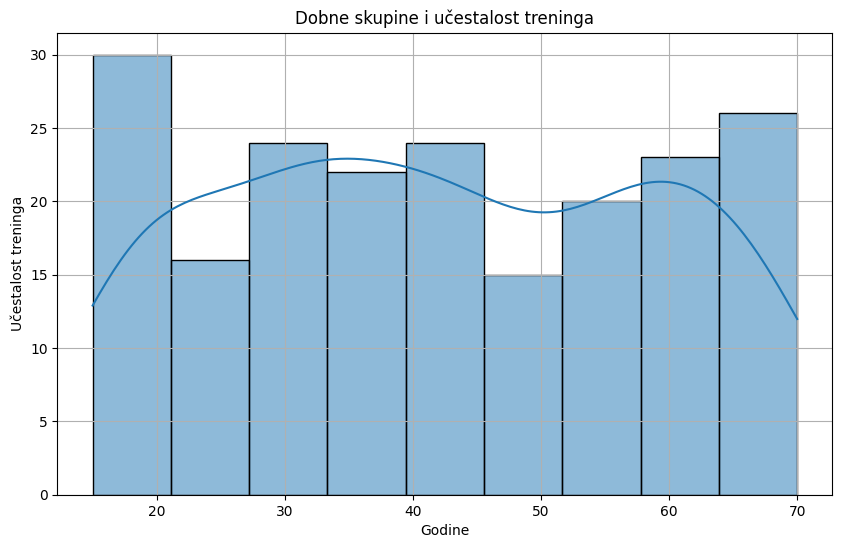

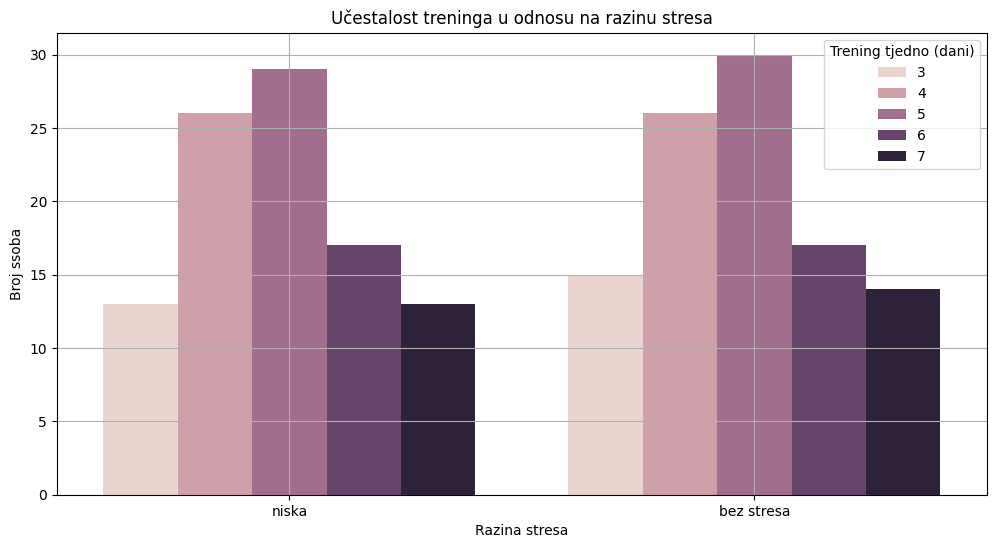

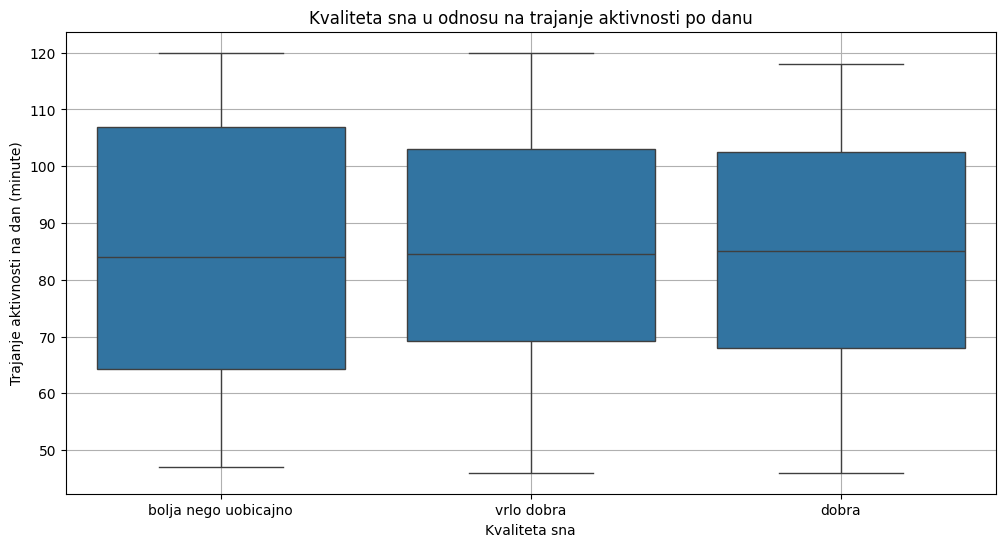

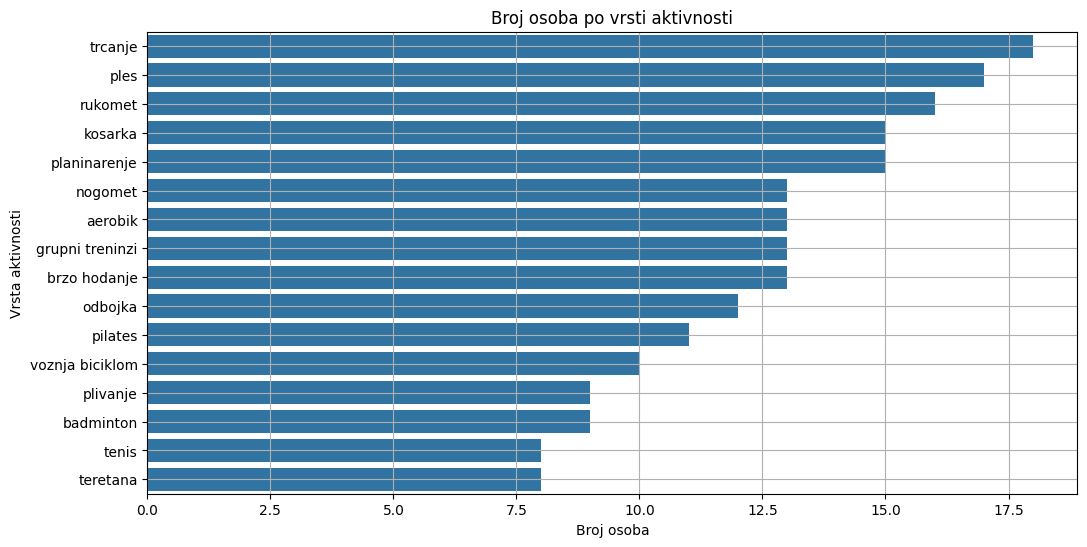

,id,samoprocjena,opce_zadovoljstvo,godine,trajanje_aktivnosti_dnevno,tjedno
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,4.810000,4.795000,42.115000,84.250000,4.900000
std,57.879185,2.911405,3.052798,16.505573,21.756013,1.235977
min,1.000000,0.000000,0.000000,15.000000,46.000000,3.000000
25%,50.750000,2.000000,2.000000,29.000000,66.750000,4.000000
50%,100.500000,5.000000,4.000000,41.000000,84.500000,5.000000
75%,150.250000,7.000000,8.000000,57.000000,105.000000,6.000000
max,200.000000,10.000000,10.000000,70.000000,120.000000,7.000000


In [29]:
# opisna statistika za numeričke stupce
descriptive_stats = data_df.describe()

# dobne skupine i učestalost treninga
plt.figure(figsize=(10, 6))
sns.histplot(data_df['godine'], kde=True)
plt.title('Dobne skupine i učestalost treninga')
plt.xlabel('Godine')
plt.ylabel('Učestalost treninga')
plt.grid(True)
plt.show()

# učestalost treninga u odnosu na razinu stresa
plt.figure(figsize=(12, 6))
sns.countplot(x='razina_stresa', data=data_df, hue='tjedno')
plt.title('Učestalost treninga u odnosu na razinu stresa')
plt.xlabel('Razina stresa')
plt.ylabel('Broj ssoba')
plt.legend(title='Trening tjedno (dani)', loc='upper right')
plt.grid(True)
plt.show()



# kvaliteta sna u odnosu na trajanje aktivnosti po danu
plt.figure(figsize=(12, 6))
sns.boxplot(x='kvaliteta_sna', y='trajanje_aktivnosti_dnevno', data=data_df)
plt.title('Kvaliteta sna u odnosu na trajanje aktivnosti po danu')
plt.xlabel('Kvaliteta sna')
plt.ylabel('Trajanje aktivnosti na dan (minute)')
plt.grid(True)
plt.show()



# broj osoba po vrsti aktivnosti
plt.figure(figsize=(12, 6))
sns.countplot(y='vrsta_aktivnosti', data=data_df, order = data_df['vrsta_aktivnosti'].value_counts().index)
plt.title('Broj osoba po vrsti aktivnosti')
plt.xlabel('Broj osoba')
plt.ylabel('Vrsta aktivnosti')
plt.grid(True)
plt.show()



descriptive_stats



### UVOD
Tjelesna aktivnost ima važnu ulogu u poboljšanju psihičkog zdravlja. Procesi kojima rekreacijska aktivnost utječe na opću dobrobit i mentalno zdravlje su veoma složeni. Zbog toga je jako teško odrediti element ponašanja i aktivnost koja će sa sigurnošću donijeti korist u bavljenju fizičkom aktivnosti [1].Analizirala sam ključne aspekte povezanosti između fizičke aktivnosti, mentalnog zdravlja i kvalitete života. Ova tema postaje sve važnija u suvremenom društvu jer sve više ljudi prepoznaje značaj očuvanja tjelesnog i mentalnog zdravlja radi boljeg kvaliteta života.
Prvo, razmotrit ćemo načine prikupljanja podataka. Koristila sam generator podataka ( https://generatedata.com/). Podaci su generirani nasumično te u dvije skupine podataka CSV i JSON. Nakon prikupljanja, podaci su prošli kroz detaljan proces pretprocesiranja i integracije. To uključuje čišćenje podataka, uklanjanje nepotrebnih varijabli te povezivanje više skupova podataka putem zajedničkih identifikatora.Kako bi se omogućio jednostavan pristup podacima, razvijeno je sučelje za pristup podacima putem REST API-ja. Ovo sučelje omogućava korisnicima da dobiju podatke na zahtjev i interagiraju s njima putem standardnih HTTP zahtjeva.Naposljetku, provedena je bazična analiza podataka i stvorene su vizualizacije koje pomažu u boljem razumijevanju odnosa između fizičke aktivnosti, mentalnog zdravlja i kvalitete života. Ove analize i vizualizacije pružaju dublji uvid u podatke i mogu biti korisne za donošenje informiranih odluka u budućnosti.


### OPIS IMPLEMENTACIJE

Implementacija se sastoji od prikupljanja podataka, pretprocesiranja i integracije podataka, pohrane poadtaka, izrade sučelja za pristup podacima te bazična analiza podataka i vizualizacija.
Prikupljanje podataka obavljeno je putem online alata za generiranje podataka generatedata.com. Kreirane su dvije datoteke: JSON i CSV, svaka s različitim podacima o sudionicima istraživanja. JSON datoteka sadrži informacije poput imena, adrese i trajanja fizičke aktivnosti, dok CSV datoteka sadrži dodatne podatke o samoprocjeni, razini stresa, kvaliteti sna i drugim aspektima života.
Pretprocesiranje podataka obuhvatilo je učitavanje i obradu podataka iz oba formata datoteka. Kako bi se olakšala daljnja analiza, iz JSON datoteke su uklonjeni nepotrebni atributi, uključujući e-mail, adresu i državu, za svih 200 sudionika istraživanja. Zatim su podaci iz CSV i JSON datoteka integrirani na temelju jedinstvenog identifikatora 'id', stvarajući tako kombinirani skup podataka za daljnju analizu.
Integrirani skup podataka pohranjen je u SQLite bazu podataka pod nazivom "projekt_Tomich.db". Ova baza omogućuje trajno pohranjivanje podataka i pristup istima putem SQL upita.
Sučelje za pristup podacima implementirano je kao RESTful API koristeći Flask, Python web framework. API omogućuje korisnicima upite za dohvat, filtriranje i manipulaciju podacima iz baze. Endpoints su definirani za dohvat svih podataka, pojedinih sudionika te za izvoz podataka u različitim formatima (npr. JSON, CSV).
Analiza podataka provodi se koristeći biblioteke kao što su pandas, matplotlib i seaborn. Bazična analiza uključuje statističke izračune, distribuciju vrijednosti te korelaciju između različitih varijabli. Vizualizacija se koristi za prikazivanje rezultata analize kroz grafove, histogrami i dijagrame raspršenosti.

### PRIKAZ RADA APLIKACIJE

Tehnička implementacija aplikacije uključuje korištenje Flask-a za pokretanje web aplikacije, te integraciju sa SQLite bazom podataka za pohranu, pristup i obradu podataka. Funkcionalnosti sučelja obuhvaćaju prikaz podataka u preglednim tablicama, vizualne prikaze podataka kroz različite vrste grafikona, kao što su stupčasti dijagrami ili scatter plotovi, te mogućnost izvršavanja osnovnih statističkih analiza.


### KRITIČKI OSVRT

Projekt je implementiran korištenjem Python biblioteka Pandas i SQLite za obradu i analizu podataka, dok su za vizualizaciju podataka korišteni Matplotlib i Seaborn. Ključni izvor podataka u ovom projektu su stanja pojedinca i njihove navike. Prva faza obrade podataka bila je provjera potpunosti podataka u datasetovima, a nakon pažljive provjere uočeno je da nema nedostajućih vrijednosti u datasetovima. Nakon ovih koraka, podaci su uspješno spojeni u novi DataFrame.
Analiza podataka započela je statističkom provjerom trajanja aktivnosti kao jednog od ključnih atributa. Upotrebom grafičkih prikaza prikazane su dvije ključne raspodjele podataka - prva se odnosi na trajanje aktivnosti i popratne zdrave navike pojedinca, dok druga prikazuje raspodjelu opće zadovoljstvo pojedinca.
U praktičnoj primjeni, ovaj projekt ima potencijal za značajan doprinos istraživanjima o važnosti fizičke aktivnosti. Međutim, važno je napomenuti da su podaci u ovom projektu nasumično generirani te nisu relevantni za stvarnu primjenu. U stvarnom okruženju, podaci bi se morali redovito ažurirati kako bi analiza ostala relevantna i korisna. Također, ukoliko bi se projekt temeljio na stvarnim podacima iz cijelog svijeta, potrebno bi bilo uzeti u obzir i pitanja vezana uz zaštitu privatnosti podataka (GDPR).


### ZAKLJUČAK

Iako je ovaj seminarski projekt baziran na nasumično generiranim podacima, bit projekta je shvatljiva. Ovaj projekt je uspješno integrirao podatke iz dav različita izvora te ih analizirao i vizualizirao radi istraživanja povezanosti između fizičke aktivnosti, mentalnog zdravlja i kvalitete života. Korištene su Python biblioteke za obradu, analizu i vizualizaciju podataka, što je omogućilo dubinsko istraživanje ključnih aspekata zdravstvenih podataka. Unatoč tome, važno je napomenuti da su podaci u ovom projektu generirani nasumično te nisu relevantni za stvarnu primjenu. U praksi, za stvarnu primjenu, potrebno je redovito ažurirati podatke i uzeti u obzir pitanja vezana uz zaštitu privatnosti podataka. Ovaj projekt pruža temelj za daljnja istraživanja i primjenu analize zdravstvenih podataka u svrhu boljeg razumijevanja.

### LITERATURA

[1] UTJECAJ REKREACIJSKIH AKTIVNOSTI NA MENTALNO ZDRAVLJE, Ilija Marić, Franjo Lovrić, Darjan Franjić(https://hrcak.srce.hr/file/364944)

 DataGenerator ( https://generatedata.com/)
 
 ChatGPT (https://chat.openai.com/)